In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

Hint:

import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

from sklearn import datasets

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [16]:
iris=pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

In [17]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
features=['sepal_length','sepal_width','petal_length','petal_width']

In [20]:
x=iris.loc[:,features].values
y=iris.loc[:,['species']].values

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2','principal component 3'])

In [22]:
finalDf=pd.concat([principalDf,iris[['species']]],axis=1)

In [23]:
x_vals=finalDf['principal component 1']
y_vals=finalDf['principal component 2']
z_vals=finalDf['principal component 3']

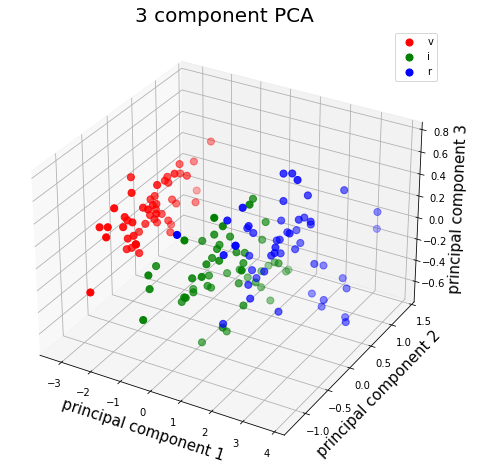

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('principal component 1',fontsize=15)
ax.set_ylabel('principal component 2',fontsize=15)
ax.set_zlabel('principal component 3',fontsize=15)
ax.set_title('3 component PCA',fontsize=20)

species=['setosa', 'versicolor', 'virginica']
colors=['r','g','b']
for species,color in zip(species,colors):
    indicesToKeep=finalDf['species']== species
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],finalDf.loc[indicesToKeep,'principal component 2'],finalDf.loc[indicesToKeep,'principal component 3'],c=color,s=50)
ax.legend(species)
ax.grid()
plt.show()